# Project

In [93]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import json
path_prefix = "/Users/sarahdelaney/Downloads/"

In [44]:
hemmorrhage_labels_df = pd.read_csv(path_prefix + "hemorrhage-labels.csv")
hemmorrhage_labels_df.head()
hemmorrhage_labels_df.loc[hemmorrhage_labels_df["Image"] == "ID_d4f2436e1"]

,Image,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
626609,ID_d4f2436e1,1,1,0,0,0,0


In [21]:
epidural_results = pd.read_csv(path_prefix + "Hemorrhage Segmentation Project/Results_Epidural.csv")
epidural_results.head()

,Case ID,Origin,URL,Labeling State,All Labels,Total Reads,Total Qualified Reads,Majority Label,Number of ROIs,Correct Label,Difficulty,Agreement,Comments,Internal Notes
0,1196514,ID_004c4b319.jpg,https://go.centaurlabs.com/problem/1196514,Labeled,"['[{""x"": 0.40818718, ""y"": 0.8623607}, {""x"": 0....",19.0,5.0,"[{""x"": 0.537109375, ""y"": 0.89453125}, {""x"": 0....",1.0,"[[{'x': 0.537109375, 'y': 0.89453125}, {'x': 0...",0.00,0.968851,NaN,NaN
1,1196682,ID_0237b835f.jpg,https://go.centaurlabs.com/problem/1196682,Ready,"['[{""x"": 0.62959146, ""y"": 0.720186}, {""x"": 0.6...",51.0,28.0,"[{""x"": 0.654296875, ""y"": 0.724609375}, {""x"": 0...",1.0,NaN,NaN,0.063519,NaN,NaN
2,1196477,ID_02e2d273d.jpg,https://go.centaurlabs.com/problem/1196477,Labeled,"['[{""x"": 0.35205495, ""y"": 0.34680602}, {""x"": 0...",22.0,6.0,"[{""x"": 0.46484375, ""y"": 0.357421875}, {""x"": 0....",1.0,"[[{'x': 0.46484375, 'y': 0.357421875}, {'x': 0...",0.06,0.710300,NaN,NaN
3,1196612,ID_02f37ce84.jpg,https://go.centaurlabs.com/problem/1196612,Ready,"['[{""x"": 0.3680166, ""y"": 0.48387372}, {""x"": 0....",51.0,29.0,"[{""x"": 0.431640625, ""y"": 0.607421875}, {""x"": 0...",2.0,NaN,NaN,0.264134,NaN,NaN
4,1196612,ID_02f37ce84.jpg,https://go.centaurlabs.com/problem/1196612,Ready,"['[{""x"": 0.3680166, ""y"": 0.48387372}, {""x"": 0....",51.0,29.0,"[{""x"": 0.353515625, ""y"": 0.59765625}, {""x"": 0....",2.0,NaN,NaN,0.264134,NaN,NaN


In [56]:
segmented_epidural_images = epidural_results['Origin'].values

/Users/sarahdelaney/Downloads/render/epidural/max_contrast_window/ID_2b08cda21.jpg


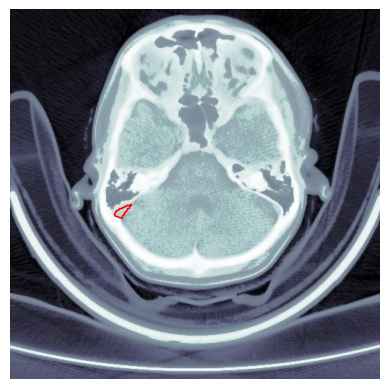

In [88]:
# first dowload just epidural/max_contrast_window images that have segmentations
epidural_max_contrast = []
for dirname, _, filenames in os.walk(path_prefix + 'render/epidural/max_contrast_window'):
    for filename in filenames:
        if filename in segmented_epidural_images:
            epidural_max_contrast.append(os.path.join(dirname, filename))

# plot random image
filename = epidural_max_contrast[5]
print(filename)
ct_scan_image = np.array(Image.open(filename))

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the CT scan image
ax.imshow(ct_scan_image, cmap='gray')

# try to get the segmentation
base_filename = os.path.basename(filename)
# Filter the DataFrame based on the 'Origin' column
filtered_df = epidural_results.loc[epidural_results['Origin'] == base_filename]

# Get the value of 'Correct Label' column, if NaN, get value from 'Majority Label'
correct_label_value = filtered_df['Correct Label'].iloc[0]
if pd.isnull(correct_label_value):
    correct_label_value = filtered_df['Majority Label'].iloc[0]
correct_label_value = json.loads(correct_label_value)

vertices = [(point['x'] * ct_scan_image.shape[1], point['y'] * ct_scan_image.shape[0]) for point in correct_label_value]
polygon_patch = patches.Polygon(vertices, closed=True, edgecolor='red', linewidth=1, fill=False)
ax.add_patch(polygon_patch)

# Show the plot
plt.axis('off')
plt.show()